In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle
country = 'Brazil'
y_name = 'TotProd'

# Create Results Dataframe

In [15]:
def create_results_df(country,mod_nam1,mod_nam2,mod_nam3,mod_nam4):
    results_dict = pickle.load(open(f'scores/{country}_{y_name}_{mod_nam1}_scores.p', "rb"))
    results_dict.update(pickle.load(open(f'scores/{country}_{y_name}_{mod_nam2}_scores.p', "rb")))
    results_dict.update(pickle.load(open(f'scores/{country}_{y_name}_{mod_nam3}_scores.p', "rb")))
    #results_dict.update(pickle.load(open(f'scores/{country}_{y_name}_{mod_nam4}_scores.p', "rb")))
    results_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    results_df = results_df.sort_values(by='RMSE', ascending=True).reset_index()
    results_df.to_csv(f'csv_output/{country}_{y_name}_df-results.csv',index=False)
    return results_df

In [16]:
results = create_results_df(country,"LinearRegression","RandomForest","XGBoost", "LSTM N-N")
results

,index,RMSE,MAE,R2
0,RandomForest,7872.081689,7628.125,-3.185119
1,XGBoost,11748.565067,11215.875,-8.321769
2,LinearRegression,18948.147558,18648.375,-23.247233


# Plot Results

In [6]:
def plot_results(results_df, country):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = (f'{country}_{y_name} Model Error Comparison'))
    sns.despine()
    
    plt.savefig(f'model_output/{country}_{y_name}_compare_models.png')

In [7]:
def plot_error(results_df, country):
    fig,ax = plt.subplots(figsize = (6,3.84))
    ax.hlines(results_df['index'],xmin=0,xmax=results_df.RMSE)
    ax.plot(results_df.RMSE,results_df.index,"o", color='black')
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.set_title(f'{country}_{y_name} Model RMSE Comparison'),
    ax.set_xlabel('Test RMSE')
    plt.savefig(f'model_output/{country}_{y_name}_compare_RMSE.png')

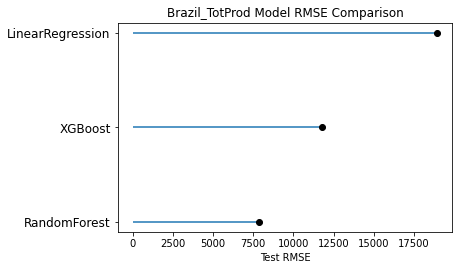

In [8]:
plot_error(results,country)

d:\bootcamp\bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\bootcamp\bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


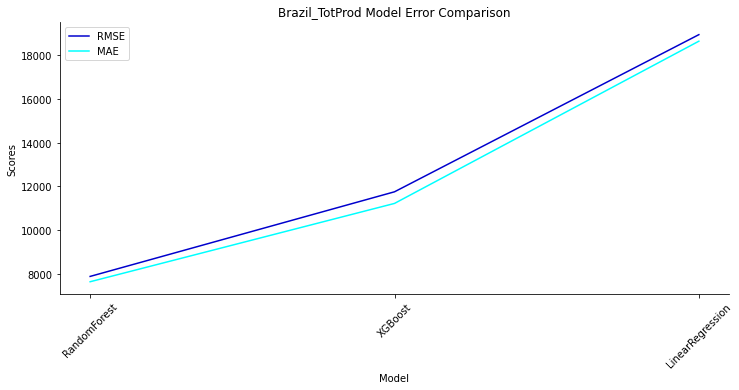

In [9]:
plot_results(results, country)